In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [3]:
# Function to load the dataset
def importdata():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', sep=',', header=None)
    return balance_data

In [11]:
# Function to split the dataset
def splitdataset(balance_data):
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10, test_size=0.20)
    return X_train, X_test, y_train, y_test


In [12]:
# Function to train and evaluate Decision Tree
def decision_tree(X_train, X_test, y_train, y_test):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_pred_gini) * 100
    cm_gini = confusion_matrix(y_test, y_pred_gini)
    cr_gini = classification_report(y_test, y_pred_gini)

    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy) * 100
    cm_entropy = confusion_matrix(y_test, y_pred_entropy)
    cr_entropy = classification_report(y_test, y_pred_entropy)

    return accuracy_gini, cm_gini, cr_gini, accuracy_entropy, cm_entropy, cr_entropy


In [13]:
# Function to train and evaluate Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return accuracy, cm, cr

In [14]:
# Function to train and evaluate Logistic Regression
def logistic_regression(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(random_state=10)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return accuracy, cm, cr


In [15]:
# Function to train and evaluate Random Forest
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return accuracy, cm, cr

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

X_train :  (500, 4)
X_test :  (125, 4)
y_train :  (500,)
y_test :  (125,)

--------------------------------------------------------

Decision Tree (Gini):

Confusion Matrix:
[[ 0  1  5]
 [ 0 44 16]
 [ 0  7 52]]

Accuracu score:
76.8

Classification Report:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         6
           L       0.85      0.73      0.79        60
           R       0.71      0.88      0.79        59

    accuracy                           0.77       125
   macro avg       0.52      0.54      0.52       125
weighted avg       0.74      0.77      0.75       125


--------------------------------------------------------

Decision Tree (Entropy):

Confusion Matrix:
[[ 0  1  5]
 [ 0 46 14]
 [ 0 11 48]]

Accuracu score:
75.2

Classification Report:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         6
           L       0.79      0.77      0.78        60
           R 

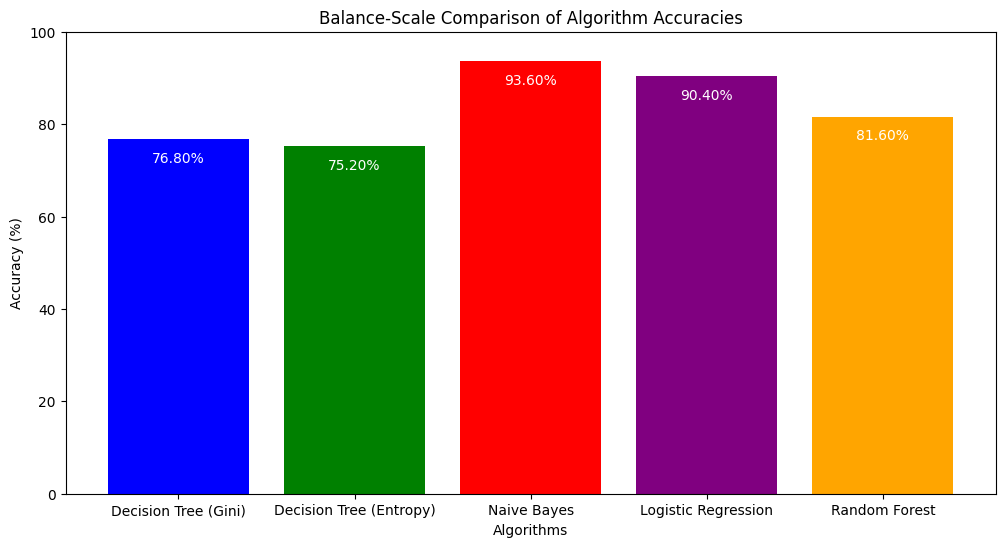

In [16]:
# Main function to run all models and plot the results
def driver():
    data = importdata()
    X_train, X_test, y_train, y_test = splitdataset(data)
    
    # Decision Tree
    gini_accuracy, gini_cm, gini_cr, entropy_accuracy, entropy_cm, entropy_cr = decision_tree(X_train, X_test, y_train, y_test)
    
    # Naive Bayes
    nb_accuracy, nb_cm, nb_cr = naive_bayes(X_train, X_test, y_train, y_test)
    
    # Logistic Regression
    lr_accuracy, lr_cm, lr_cr = logistic_regression(X_train, X_test, y_train, y_test)
    
    # Random Forest
    rf_accuracy, rf_cm, rf_cr = random_forest(X_train, X_test, y_train, y_test)
    
    # Collecting accuracy scores for plotting
    algorithms = ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
    accuracies = [gini_accuracy, entropy_accuracy, nb_accuracy, lr_accuracy, rf_accuracy]

    
    #printing training and testing input values
    print('X_train : ',X_train.shape)
    print('X_test : ',X_test.shape)
    print('y_train : ',y_train.shape)
    print('y_test : ',y_test.shape)
    print("\n--------------------------------------------------------\n")

    # Printing confusion matrices ,accuracy and classification reports
    print("Decision Tree (Gini):\n")
    print("Confusion Matrix:")
    print(gini_cm)
    print("\nAccuracu score:")
    print(gini_accuracy)
    print("\nClassification Report:")
    print(gini_cr)
    print("\n--------------------------------------------------------\n")

    print("Decision Tree (Entropy):\n")
    print("Confusion Matrix:")
    print(entropy_cm)
    print("\nAccuracu score:")
    print(entropy_accuracy)
    print("\nClassification Report:")
    print(entropy_cr)
    print("\n--------------------------------------------------------\n")

    print("Naive Bayes:\n")
    print("Confusion Matrix:")
    print(nb_cm)
    print("\nAccuracu score:")
    print(nb_accuracy)
    print("\nClassification Report:")
    print(nb_cr)
    print("\n--------------------------------------------------------\n")

    print("Logistic Regression:\n")
    print("Confusion Matrix:")
    print(lr_cm)
    print("\nAccuracu score:")
    print(lr_accuracy)
    print("\nClassification Report:")
    print(lr_cr)
    print("\n--------------------------------------------------------\n")

    print("Random Forest:\n")
    print("Confusion Matrix:")
    print(rf_cm)
    print("\nAccuracu score:")
    print(rf_accuracy)
    print("\nClassification Report:")
    print(rf_cr)
    print("\n--------------------------------------------------------\n")

    
    # Plotting the bar chart for accuracies
    plt.figure(figsize=(12, 6))
    bars = plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy (%)')
    plt.title('Balance-Scale Comparison of Algorithm Accuracies')
    plt.ylim(0, 100)
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{acc:.2f}%', ha='center', color='white', fontsize=10)
    plt.show()
    
if __name__ == "__main__":
    driver()
